### 학습 목표

- 초대용량 데이터는 어떻게 처리할까요?


- 데이터를 분할하여 불러오고 처리하는 방법에 대해서 연습해봅니다.


- 불량 검출 문제에 대해 살펴봅니다.


- Class imbalance 문제를 해결하는 방법에 대해 알아봅니다.

## Bosch Production Line Performance

- 공정과정 데이터를 통해 제품 내부 불량 검출하기

- 주어진 공정변수를 이용하여 정상/불량 분류하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_numeric_part = pd.read_csv('../input/bosch-production-line-performance/train_numeric.csv.zip',
                                nrows=1000)     # 데이터를 불러올 때 몇개의 Row를 불러올것인가
train_categorical_part = pd.read_csv('../input/bosch-production-line-performance/train_categorical.csv.zip',
                                    nrows=1000)
train_date_part = pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip',
                             nrows=1000)

print(train_numeric_part.shape, train_categorical_part.shape, train_date_part.shape)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,407,410,413,416,419,422,425,428,431,434,437,440,443,446,449,452,455,458,461,464,467,470,473,476,479,482,485,488,491,494,497,500,503,506,509,512,515,518,611,614,617,620,623,626,629,632,635,638,641,644,647,650,653,656,659,662,665,668,671,674,677,680,683,686,689,692,695,698,701,704,707,710,713,716,719,722,1005,1007,1008,1010,1011,1013,1014,1016,1017,1019,1020,1022,1023,1025,1026,1028,1029,1031,1032,1034,1035,1037,1038,1040,1041,1043,1044,1046,1047,1049,1050,1052,1126,1129,1132,1135,1138,1141,1144,1147,1183,1185,1188,1191,1194,1197,1200,1203,1206,1209,1212,1215

(1000, 970) (1000, 2141) (1000, 1157)


In [2]:
train_date_part

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2050,36.41,36.41,36.41,36.41,36.41,36.41,36.41,36.41,36.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2053,568.93,568.93,568.93,568.93,568.93,568.93,568.93,568.93,568.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. 대용량 데이터 다루기

**Technique1. 잘라서 불러오기 (read_csv 함수를 사용하는 방법)**

1) row 단위로 일부를 가져오기

- nrows : 지정한 row 개수만큼만 잘라서 가져옵니다. (위에서부터)

- chunksize : for문을 사용해서 매번 특정 row개수씩 가져옵니다. (위에서부터 순서대로)



2) column 단위로 일부를 가져오기

- usecols : 사용할 column들만 지정해서 가져옵니다.





**Technique2. Reducing Memory Technique (dtype 변경하기)**

In [3]:
# Technique 1.
## 1) train_date_part를 가지고, 각 station별 feature를 뽑아봅니다.
### 가정. station별로 측정 시간이 모두 같으면, 하나씩만 사용하자. (X)
### 결론. station별 측정 시간을 평균값으로 사용하자. (time feature)
station_names = train_date_part.count().reset_index()['index'].str.split("_", expand=True)[1][1:].drop_duplicates().values
train_date = pd.DataFrame()
# 10만개씩 가져옴.
chunks = pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip', chunksize=100000)
for chunk in chunks:
    print(chunk.shape)
    temp_date = pd.DataFrame()

    for station in station_names:
        station_cols = chunk.columns[chunk.columns.str.contains(station)]
        col_means = chunk[station_cols].mean(axis=1) # 각 station에 대해서 row별 평균
        temp_date[station] = col_means
    train_date = pd.concat([train_date, temp_date]) ## 각 station별 측정시간의 평균으로 데이터를 요약한 정보.

train_date

(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(100000, 1157)
(83747, 1157)


,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S42,S43,S44,S45,S46,S47,S48,S49,S50,S51
0,82.24,82.266000,86.632500,87.271014,82.26,NaN,NaN,82.26,82.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1313.126333,1315.132195,1315.735979,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1618.70,1618.726000,1623.687500,1624.412990,NaN,1618.72,1618.72,NaN,1618.73,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1149.20,1149.217333,1153.506250,1154.136392,1149.22,NaN,NaN,1149.22,1149.22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,602.64,602.666000,606.000000,605.718774,602.66,NaN,NaN,602.67,602.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,1239.90,1239.900000,1242.755306,1244.018969,1239.93,NaN,1239.93,NaN,1239.94,1239.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183743,NaN,624.224000,626.085732,626.644433,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183744,1482.18,1482.180000,1490.350000,1489.741869,NaN,1482.20,1482.21,NaN,1482.21,1482.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183745,608.83,608.830000,610.730000,610.574151,608.85,NaN,NaN,608.85,608.85,608.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183747 entries, 0 to 1183746
Data columns (total 52 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   S0      673862 non-null   float64
 1   S1      915747 non-null   float64
 2   S2      1165689 non-null  float64
 3   S3      1183098 non-null  float64
 4   S4      377120 non-null   float64
 5   S5      381031 non-null   float64
 6   S6      338988 non-null   float64
 7   S7      335698 non-null   float64
 8   S8      673881 non-null   float64
 9   S9      225679 non-null   float64
 10  S10     224540 non-null   float64
 11  S11     225452 non-null   float64
 12  S12     242061 non-null   float64
 13  S13     242065 non-null   float64
 14  S14     120625 non-null   float64
 15  S15     121445 non-null   float64
 16  S16     119139 non-null   float64
 17  S17     123027 non-null   float64
 18  S18     121081 non-null   float64
 19  S19     121027 non-null   float64
 20  S20     242111 non-null 

In [5]:
## TO-DO
# train_numeric 데이터를 불러와서, 전체 결측치 비율을 column별로 측정한 다음에
# 결측치가 50%를 넘는 모든 column을 제거한 DataFrame을 train_numeric으로 저장해서 출력해주세요.

chunks = pd.read_csv('../input/bosch-production-line-performance/train_numeric.csv.zip',
                    chunksize=100000)

# column별 결측치를 담을 변수.(pd.Series)
missing_ratio = pd.Series(index=train_numeric_part.columns,
                         data=np.zeros(len(train_numeric_part.columns)))
# 전체 데이터 개수
n_data = 0

for chunk in chunks:
    temp = chunk.isnull().sum() # column별 결측치
    
    missing_ratio = missing_ratio + temp
    n_data = n_data + len(chunk)
    
missing_ratio = missing_ratio / n_data # 합 -> 비율 변경
missing_ratio

Id              0.000000
L0_S0_F0        0.430738
L0_S0_F2        0.430738
L0_S0_F4        0.430738
L0_S0_F6        0.430738
                  ...   
L3_S51_F4256    0.949438
L3_S51_F4258    0.949438
L3_S51_F4260    0.949438
L3_S51_F4262    0.949438
Response        0.000000
Length: 970, dtype: float64

In [6]:
drop_cols = train_numeric_part.columns[missing_ratio >= 0.5]
usecols = np.setdiff1d(train_numeric_part.columns, drop_cols) # 158 columns

train_numeric = pd.read_csv('../input/bosch-production-line-performance/train_numeric.csv.zip',
                           usecols=usecols)
train_numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S33_F3873,L3_S34_F3876,L3_S34_F3878,L3_S34_F3880,L3_S34_F3882,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,-0.023,0.033,-0.015,-0.016,-0.013,0.070,0.008,-0.032,0.178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1183744,2367492,0.075,0.123,-0.343,-0.325,0.031,0.161,-0.030,-0.232,0.214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1183745,2367493,-0.062,-0.019,-0.179,-0.179,-0.100,0.116,0.000,-0.072,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
import gc

gc.collect() # 메모리 청소기

84

In [8]:
# JOIN 연산을 할 기준인 Id column을 추가합니다.
train_date.columns = 't_' + train_date.columns  # 시간 관련 feature임을 알리기 위해 column name 변경.
train_date["Id"] = train_numeric.Id  # Id column 추가.
train_date

,t_S0,t_S1,t_S2,t_S3,t_S4,t_S5,t_S6,t_S7,t_S8,t_S9,...,t_S43,t_S44,t_S45,t_S46,t_S47,t_S48,t_S49,t_S50,t_S51,Id
0,82.24,82.266000,86.632500,87.271014,82.26,NaN,NaN,82.26,82.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,NaN,1313.126333,1315.132195,1315.735979,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,1618.70,1618.726000,1623.687500,1624.412990,NaN,1618.72,1618.72,NaN,1618.73,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,1149.20,1149.217333,1153.506250,1154.136392,1149.22,NaN,NaN,1149.22,1149.22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,602.64,602.666000,606.000000,605.718774,602.66,NaN,NaN,602.67,602.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,1239.90,1239.900000,1242.755306,1244.018969,1239.93,NaN,1239.93,NaN,1239.94,1239.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367490
1183743,NaN,624.224000,626.085732,626.644433,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367491
1183744,1482.18,1482.180000,1490.350000,1489.741869,NaN,1482.20,1482.21,NaN,1482.21,1482.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367492
1183745,608.83,608.830000,610.730000,610.574151,608.85,NaN,NaN,608.85,608.85,608.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367493


In [9]:
# Id column을 기준으로 같은 Id를 가지는 데이터끼리 column을 합쳐줍니다. ---> INNER JOIN
train = pd.merge(train_numeric, train_date, on="Id")
train

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,t_S42,t_S43,t_S44,t_S45,t_S46,t_S47,t_S48,t_S49,t_S50,t_S51
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,-0.023,0.033,-0.015,-0.016,-0.013,0.070,0.008,-0.032,0.178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183744,2367492,0.075,0.123,-0.343,-0.325,0.031,0.161,-0.030,-0.232,0.214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183745,2367493,-0.062,-0.019,-0.179,-0.179,-0.100,0.116,0.000,-0.072,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 안쓰는 데이터 제거 (메모리에서 제거)
del train_numeric
del train_date
del train_numeric_part
del train_date_part
del train_categorical_part

gc.collect()

63

In [11]:
# 결측치가 50%가 넘는 column들 제거.
#drop_cols = train.columns[train.isnull().mean() >= 0.5]
usecols = train.columns[train.isnull().mean() < 0.5]
train = train[usecols]
train

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,t_S0,t_S1,t_S2,t_S3,t_S8,t_S29,t_S30,t_S33,t_S34,t_S37
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,82.24,82.266000,86.632500,87.271014,82.27,87.26,87.26,87.28,87.28,87.29
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1313.126333,1315.132195,1315.735979,NaN,1315.73,1315.73,1315.75,1315.75,1315.75
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,1618.70,1618.726000,1623.687500,1624.412990,1618.73,1624.40,1624.41,1624.42,1624.42,1624.42
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,1149.20,1149.217333,1153.506250,1154.136392,1149.22,1154.12,1154.13,1154.14,1154.15,1154.16
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,602.64,602.666000,606.000000,605.718774,602.67,606.00,606.00,606.01,606.01,606.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,-0.023,0.033,-0.015,-0.016,-0.013,0.070,0.008,-0.032,0.178,...,1239.90,1239.900000,1242.755306,1244.018969,1239.94,1244.01,1244.01,1244.04,1244.04,1244.04
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,624.224000,626.085732,626.644433,NaN,626.64,626.64,626.65,626.65,626.66
1183744,2367492,0.075,0.123,-0.343,-0.325,0.031,0.161,-0.030,-0.232,0.214,...,1482.18,1482.180000,1490.350000,1489.741869,1482.21,1490.35,1490.36,1490.60,1490.61,1490.61
1183745,2367493,-0.062,-0.019,-0.179,-0.179,-0.100,0.116,0.000,-0.072,0.025,...,608.83,608.830000,610.730000,610.574151,608.85,610.73,610.73,610.75,610.75,610.75


In [12]:
# 결측치를 모두 0으로 채웁니다.
train = train.fillna(0)
train

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,t_S0,t_S1,t_S2,t_S3,t_S8,t_S29,t_S30,t_S33,t_S34,t_S37
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,82.24,82.266000,86.632500,87.271014,82.27,87.26,87.26,87.28,87.28,87.29
1,6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.00,1313.126333,1315.132195,1315.735979,0.00,1315.73,1315.73,1315.75,1315.75,1315.75
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,1618.70,1618.726000,1623.687500,1624.412990,1618.73,1624.40,1624.41,1624.42,1624.42,1624.42
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,1149.20,1149.217333,1153.506250,1154.136392,1149.22,1154.12,1154.13,1154.14,1154.15,1154.16
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,602.64,602.666000,606.000000,605.718774,602.67,606.00,606.00,606.01,606.01,606.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,-0.023,0.033,-0.015,-0.016,-0.013,0.070,0.008,-0.032,0.178,...,1239.90,1239.900000,1242.755306,1244.018969,1239.94,1244.01,1244.01,1244.04,1244.04,1244.04
1183743,2367491,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.00,624.224000,626.085732,626.644433,0.00,626.64,626.64,626.65,626.65,626.66
1183744,2367492,0.075,0.123,-0.343,-0.325,0.031,0.161,-0.030,-0.232,0.214,...,1482.18,1482.180000,1490.350000,1489.741869,1482.21,1490.35,1490.36,1490.60,1490.61,1490.61
1183745,2367493,-0.062,-0.019,-0.179,-0.179,-0.100,0.116,0.000,-0.072,0.025,...,608.83,608.830000,610.730000,610.574151,608.85,610.73,610.73,610.75,610.75,610.75


In [13]:
gc.collect()

63

In [14]:
# Technique 2.
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
#             print("******************************")
#             print("Column: ",col)
#             print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
                
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
#             print("dtype after: ",props[col].dtype) 
#             print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [15]:
train, _ = reduce_mem_usage(train)

Memory usage of properties dataframe is : 1526.2851181030273  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  730.4041948318481  MB
This is  47.85502958579882 % of the initial size


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183747 entries, 0 to 1183746
Columns: 168 entries, Id to t_S37
dtypes: float32(156), int8(10), uint32(1), uint8(1)
memory usage: 730.4 MB


### 2. 불량 검출 문제 다루기 (Class Imbalance problem)

#### Technique 1. Sampling Method (Under / Over)


- 1000000(정상) : 100(불량) = 10000 : 1   ----> 컴퓨터는 모든 데이터를 정상이라고 예측하려고 합니다.

--> 1:1 비율로 변경이 필요합니다! (예측 성능이 좋아짐)


**개수가 많은 클래스 = majority class, 개수가 적은 클래스 = minority class**


**1) Undersampling**
- majority class에서 sampling을 하여, minority class의 수로 맞춰주는 기법.

e.g. 1000000->100   ------> 100 : 100 = 1 : 1


**2) Oversampling**
- minority class에서 sampling(generation)을 하여, majority class의 수를 맞춰주는 기법.

e.g. 100->1000000 --------> 1000000 : 1000000 = 1 : 1 


**3) Hybrid approach (under + over)**
- undersampling과 oversampling을 사용하여 1:1의 비율을 맞춰주는 기법.

e.g. 1000000->10000, 100->10000  -------> 10000 : 10000 = 1 : 1




#### Technique 2. Change to Outlier Detection problem  (SKIP)

- DBSCAN, IsolationForest (Unsupervised learning approach)

0    1176868
1       6879
Name: Response, dtype: int64

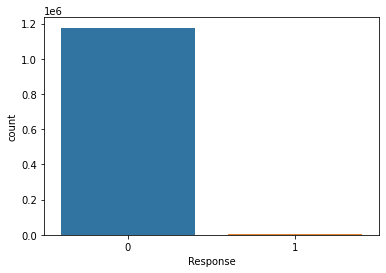

In [17]:
# Technique 1.
sns.countplot(data=train, x="Response")
train.Response.value_counts()

In [18]:
normal = train[train.Response == 0]
abnormal = train[train.Response == 1]


# Undersampling
under_normal = normal.sample(n=len(abnormal), random_state=42)
u_train = pd.concat([under_normal, abnormal])
u_train # 13758 = 6879 x 2

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,t_S0,t_S1,t_S2,t_S3,t_S8,t_S29,t_S30,t_S33,t_S34,t_S37
392865,786228,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000000,0.000000,489.220428,506.475372,0.000000,506.470001,506.470001,506.480011,506.480011,506.489990
181531,362995,0.056,0.011,-0.015,-0.016,0.031,0.116,-0.015,-0.032,0.168,...,1090.859985,1090.859985,1091.393799,1091.484375,1090.880005,1091.469971,1091.479980,1091.489990,1091.489990,1091.500000
177639,355244,-0.029,-0.064,-0.015,-0.052,-0.230,0.025,0.000,0.088,0.234,...,1434.349976,1434.349976,1441.219971,1440.644287,1434.369995,1441.219971,1441.219971,1441.239990,1441.239990,1441.250000
692914,1386564,0.147,0.123,-0.015,-0.016,0.031,0.161,-0.030,-0.112,0.097,...,1105.650024,1105.676025,1107.400024,1107.257446,1105.670044,1107.400024,1107.400024,1107.420044,1107.420044,1107.430054
565943,1132718,-0.055,-0.078,-0.215,-0.197,0.161,0.025,0.000,0.008,0.000,...,99.599998,99.652000,101.714348,102.039856,99.660004,102.029999,102.029999,102.050003,102.050003,102.059998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183037,2366099,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000000,554.697693,554.717896,555.679993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1183052,2366124,0.101,0.048,0.003,0.003,-0.100,-0.248,-0.015,-0.072,0.132,...,1547.209961,1547.235962,1550.959961,1550.647949,1547.239990,1550.959961,1550.959961,1550.979980,1550.979980,1550.979980
1183093,2366209,0.016,0.041,-0.179,-0.179,0.074,0.116,-0.015,-0.072,0.030,...,889.289978,889.307312,893.777649,895.406616,889.309998,895.400024,895.400024,895.419983,895.419983,895.429993
1183242,2366505,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000000,188.969330,189.581589,189.767532,0.000000,189.759995,189.759995,189.770004,189.770004,189.789993


In [19]:
# Oversampling (= Generation)
from imblearn.over_sampling import SMOTE

X_train = train.drop(columns=["Id", 'Response'])
y_train = train.Response

## fit_resample 함수가 자동으로 y_train을 보고 minority class를 찾아서 1:1의 비율로 맞춰줍니다.
oX_train, oy_train = SMOTE().fit_resample(X_train, y_train)
print(oX_train.shape, oy_train.shape) # (1176868, 168) / (1176868, 168)

(2353736, 166) (2353736,)


In [20]:
# Hybrid (under + over)
from imblearn.over_sampling import SMOTE
n_sample = 10000

normal = train[train.Response == 0].sample(n=n_sample) # majority class에서 10,000개 Undersampling
abnormal = train[train.Response == 1]

temp = pd.concat([normal, abnormal]) # 10000 + 6879
X_temp = temp.drop(columns=["Id", 'Response'])
y_temp = temp.Response

hX_train, hy_train = SMOTE().fit_resample(X_temp, y_temp) # 10000 + 10000(6879 -> 10000)
print(hX_train.shape, hy_train.shape) # (20000, 168) / (20000, 168)

(20000, 166) (20000,)


In [21]:
hy_train.value_counts()

0    10000
1    10000
Name: Response, dtype: int64

In [22]:
# Technique 2.